# ML Summer School Assignment 4

This assignment is divided into 2 parts, in the first part you guys will be implementing Kmeans clustering from scratch without the use of any machine learning libraries like sklearn for the task of document clustering and the second part (probably more interesting :P) will guide you to make a recommender system of your own!

## Task 1

This task features clustering sysnopses of Top 100 movies as rated by IMdB. The task is to identify movies that fall into the same genre using an usupervised approach such as K-Means clustering to cluster movies whose synopses refer to similar structures.

### Load Libraries
These libraries will be needed to complete this task. While you'll have most of them already installed if you have followed the previous assignments, you can easily install the rest by googling (:D) 

In [1]:
import numpy as np
import pandas as pd
import nltk
import re
import os
from sklearn import feature_extraction
import pickle
import scipy

### Load data
The ratings are taken from IMdB and synopses scraped from IMdB and Wikipedia (we have already done this for you) and stored as pickled lists, you can always take a look at them to get a better feel of the data.

In [2]:
titles=pickle.load(open('data/titles.pkl','rb'))
links=pickle.load(open('data/links.pkl','rb'))
genres=pickle.load(open('data/genres.pkl','rb'))
ranks=pickle.load(open('data/ranks.pkl','rb'))
synopses=pickle.load(open('data/synopses.pkl','rb'))
print(len(titles),len(links),len(genres),len(ranks),len(synopses))

100 100 100 100 100


### Heads Up!
Before you move forward, you'll have to download 3 NLTK packages, namely, `stopwords`, `punkt` and `wordnet` in order to do the required preprocessing of synopses.
To download them, just run the cell below, press 'd', type the names of the packages and you're good to go! :)

In [3]:
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

### Sub Task 1 -  Preprocessing the Data
You'll have to preprocess the data in this sub-task. Mainly, we'll be removing stopwords, tokenizing and lemmatizing.

1. You already know about stopwords from your previous assignments. Stop words are words like "a", "the", or "in" which don't convey significant meaning. You can read more about them [here](https://en.wikipedia.org/wiki/Stop_words)

2. Lemmatisation (or lemmatization) in linguistics, is the process of grouping together the different inflected forms of a word so they can be analysed as a single item. More [here](https://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html) and [here](https://textminingonline.com/dive-into-nltk-part-iv-stemming-and-lemmatization). We will be using the WordNet Lemmatizer.

3. Tokenization is the act of breaking up a sequence of strings into pieces such as words, keywords, phrases, symbols and other elements called tokens. Tokenization plays a large part in the process of lexical analysis. We will be using NLTK's inbuilt tokennizer. More [here](https://textminingonline.com/dive-into-nltk-part-ii-sentence-tokenize-and-word-tokenize)

In [4]:
#load english language stopwords from nltk and store it in the list stopwords 
stopwords = nltk.corpus.stopwords.words('english')

In [5]:
#import the Wornet Lemmatizer and create a lemmatizer object for the english language
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

Your task starts here, fill in the function `tokenize_and_lemmatize()`. 
* The first function returns a nested list of lemmatized tokens. You'll have to filter out the tokens which do not contain any letters. Particularly return the list `lemmas`, `ith` entry of which contains the lemmatized tokens of the `ith` sentence in the given synopses text.

    Sample Input: `"COPS is dope af. Jeena yahaan marna yahaan"`
    
    Sample Output: `[["COPS", "is", "dope", 'af'], ["Jeena", "yahaan", "marna", "yahaan"]]`
    
    Sample Input (Probably more helpful :P): `"Provision owed ear. Said crying meant cement"`
    
    Sample Output: `[["provid", "ow", "ear"], ["cry", "meant", "sem"]]`

In [6]:
def tokenize_and_lemmatize(text):
    # first tokenize by sentence, then by word to ensure that we have sentence wise list of tokens (i.e. a nested list)
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    lemmas = [lemmatizer.lemmatize(t) for t in filtered_tokens]
    return lemmas

We create `totalvocab_lemmatized` for all the words in the vocabulary (i.e. all the words in all the synopses combined)

In [7]:
totalvocab_lemmatized = []
for i in synopses:
    allwords_lemmatized = tokenize_and_lemmatize(i)
    totalvocab_lemmatized.extend(allwords_lemmatized)

### Sub Task 2 - Creating the Features
In this task you will have to create the tfidf matrix which will we used to cluster the given synopses. You have leart about tfidf features from the previous assignments. More about it [here](http://blog.christianperone.com/2011/09/machine-learning-text-feature-extraction-tf-idf-part-i/) and [here](http://blog.christianperone.com/2011/10/machine-learning-text-feature-extraction-tf-idf-part-ii/). You can use the `TfidfVectorizer` provided by sklearn.
Store the matrix in the variable `tfidf_matrix`.

**A bit about the various parameters you can use to get better features and hence better clusters which using the sklearn tfidfVectorizer.**(This is very very important to get good results)
* max_df: this is the maximum frequency within the documents a given feature can have to be used in the tfi-idf matrix. If the term is in greater than 80% of the documents it probably cares little meanining (in the context of film synopses)
* min_df: this could be a proportion (e.g. 0.2) and the term would have to be in at least 20% of the documents to be considered.
* ngram_range: this just means I'll look at unigrams, bigrams and trigrams. See [n-grams](http://en.wikipedia.org/wiki/N-gram)

Also, use 'english' for the `stop_words` parameter and `tokenize_and_lemmatize`(the function you wrote) for `tokenizer` parameter in the Vectorizer.

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000,
                                 min_df=0.2, stop_words='english',
                                 use_idf=True, tokenizer=tokenize_and_lemmatize, ngram_range=(1,3))

%time tfidf_matrix = tfidf_vectorizer.fit_transform(synopses)

print(tfidf_matrix.shape)
terms = tfidf_vectorizer.get_feature_names()

CPU times: user 6.31 s, sys: 156 ms, total: 6.47 s
Wall time: 6.47 s
(100, 480)


In [9]:
tfidf_matrix

<100x480 sparse matrix of type '<class 'numpy.float64'>'
	with 16293 stored elements in Compressed Sparse Row format>

### Sub Task 3 - Implementing KMeans

This is the most important sub-task of this task because in this, you will implement your own K-Means. Fill in the function `KMeans` which will return the labels and cluster centers in the tuple `(labels,centers)` for the given feature matrix `X` and `num_clusters`. We also pass the `max_iter` parameter to run KMeans for that many iterations as it sometimes gets stuck on a local minima. You can learn more about Kmeans clustering [here](https://en.wikipedia.org/wiki/K-means_clustering) and [here](https://www.datascience.com/blog/k-means-clustering).

Sample Input: `[[2,1], [2,3], [8,1], [8,3]]`, `num_clusters=2`

Sample Output: `([0,0,1,1], [[2,2], [8,2]])`

In [10]:
def Kmeans(X, num_clusters=8, max_iter=300):
    n_data_points=X.shape[0]
    n_dimensions=X.shape[1]
    np.random.seed(42)
    centers=X[np.random.choice(X.shape[0], num_clusters, replace=False), :]
    labels=np.zeros(n_data_points)
    for z in range(max_iter):
        for i,x in enumerate(X):
            min_dist=1e12
            for j,center in enumerate(centers):
                dist=np.linalg.norm(np.subtract(x,center))
                if dist<min_dist:
                    min_dist=dist
                    labels[i]=j
        for i,center in enumerate(centers):
            centers[i][:]=np.mean(X[np.unique(np.where(labels==i)[0]), :], axis=0)
    return (labels, centers)

Fit the computed tf-idf matrix using the function written above to obtain the labels and the centers. You can play with different number of centers and maximum iterations to get different results.

In [11]:
%time (labels,centers)=Kmeans(tfidf_matrix.todense(), num_clusters=5, max_iter=1000)

CPU times: user 10.2 s, sys: 93.8 ms, total: 10.3 s
Wall time: 10.4 s


Create a dataframe `frame` that stores the the clusters labels, names and genres for all the 100 movies.

In [12]:
import pandas as pd
films = { 'title': titles, 'rank': ranks, 'synopsis': synopses, 'cluster': labels, 'genre': genres }
frame = pd.DataFrame(films, index = [labels] , columns = ['rank', 'title', 'cluster', 'genre'])
frame

,rank,title,cluster,genre
2.0,0,The Godfather,2.0,"[u' Crime', u' Drama']"
2.0,1,The Shawshank Redemption,2.0,"[u' Crime', u' Drama']"
4.0,2,Schindler's List,4.0,"[u' Biography', u' Drama', u' History']"
2.0,3,Raging Bull,2.0,"[u' Biography', u' Drama', u' Sport']"
0.0,4,Casablanca,0.0,"[u' Drama', u' Romance', u' War']"
0.0,5,One Flew Over the Cuckoo's Nest,0.0,[u' Drama']
4.0,6,Gone with the Wind,4.0,"[u' Drama', u' Romance', u' War']"
2.0,7,Citizen Kane,2.0,"[u' Drama', u' Mystery']"
4.0,8,The Wizard of Oz,4.0,"[u' Adventure', u' Family', u' Fantasy', u' Mu..."
4.0,9,Titanic,4.0,"[u' Drama', u' Romance']"


Movie counts for a particular cluster.

In [13]:
frame['cluster'].value_counts()

0.0    28
4.0    28
3.0    15
2.0    15
1.0    14
Name: cluster, dtype: int64

### Interpreting Results
Sort the cluster centers to get the most important terms per cluster and store it in `cluster_names`. Also print them along with the movies in that cluster to get a feel of the clusters you have made with your KMeans.

In [14]:
print("Top terms per cluster:")
order_centroids = np.asarray(centers).argsort()[:, ::-1]
cluster_names=[]
for i in range(0,order_centroids.shape[0]):
    print("Cluster %d words:" % i, end='')
    q=""
    for ind in order_centroids[i, :6]:
        print(' %s' % terms[ind], end=',')
        q+=str(terms[ind])
        q+=" "
    cluster_names.append(q)
    print()
    print("Cluster %d titles:" % i, end='')
    for title in frame.loc[i]['title'].values.tolist():
        print(' %s,' % title, end='')
    print()
    print()

Top terms per cluster:
Cluster 0 words: mr., police, car, apartment, say, n't,
Cluster 0 titles: Casablanca, One Flew Over the Cuckoo's Nest, Psycho, Sunset Blvd., Vertigo, West Side Story, 2001: A Space Odyssey, Singin' in the Rain, Some Like It Hot, Gandhi, Rocky, To Kill a Mockingbird, The Apartment, Fargo, Shane, The Green Mile, Nashville, The Graduate, American Graffiti, Pulp Fiction, The African Queen, The Maltese Falcon, A Clockwork Orange, Taxi Driver, Wuthering Heights, Rear Window, The Third Man, North by Northwest,

Cluster 1 words: soldier, men, town, kill, killed, little,
Cluster 1 titles: The Silence of the Lambs, 12 Angry Men, Saving Private Ryan, Unforgiven, Raiders of the Lost Ark, Jaws, Butch Cassidy and the Sundance Kid, The Treasure of the Sierra Madre, Platoon, High Noon, The Deer Hunter, All Quiet on the Western Front, The Grapes of Wrath, Close Encounters of the Third Kind,

Cluster 2 words: father, brother, family, car, new york, police,
Cluster 2 titles: The Go

### Plotting the Data
Now we plot the various movie clusters.
Basically we scale the multi-dimentional feature vector by applying 2 dimensional PCA. It is a technique used to visualize multi-dimensional plots in 2 dimensions. More about it [here](http://www.apnorton.com/blog/2016/12/19/Visualizing-Multidimensional-Data-in-Python/).

In [15]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA as sklearnPCA

In [16]:
pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(tfidf_matrix.todense()))

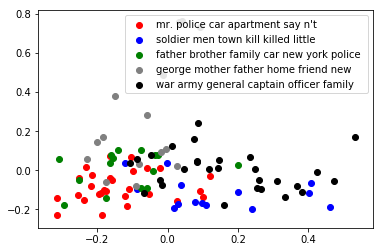

In [17]:
colors=['red','blue','green','gray','black','yellow','orange','brown']
for i in range(len(cluster_names)):
    plt.scatter(transformed[labels==i][0], transformed[labels==i][1], label=cluster_names[i], c=colors[i])
plt.legend()
plt.show()